In [1]:
# 5430 hw5

In this exploratory data analysis (EDA), I will be examining the inpatient hospital charges dataset by creating new features derived from the existing data. I will explore various dimensions such as providers, diagnoses, costs, and geographic locations. By generating 10 new features and analyzing them, I aim to uncover patterns and insights that will enhance my understanding of the data and support predictive modeling efforts.








In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

%matplotlib inline


In [2]:
# Load the dataset
df = pd.read_csv('/Users/yanghaoran/Desktop/5420 anomly detection/HW5/inpatientCharges.csv')


In [3]:
skim(df)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 163065 │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 12     │ │ int64       │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name          ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Provider Id          │   0 │     0 │  255600 │ 151600 │ 10000 │ 110100 │ 250000 │ 380100 │ 670100 │ ▇▆▆▆▅  │  │
│ │ Provider Zip Code    │   0 │     0 │   47940 │  27850 │  1040 │  27260 │  44310 │  72900 │  99840 │ ▆▇▇▅▅▅ │  │
│ │  Total Discharges    │   0 │     0 │   42.78 │   51.1 │    11 │     17 │     27 │     49 │   3383 │   ▇    │  │
│ └──────────────────────┴─────┴───────┴─────────┴────────┴───────┴────────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ DRG Definition                        │     0 │         0 │                      8.2 │             1337854 │  │
│ │ Provider Name                         │     0 │         0 │                      3.8 │              626933 │  │
│ │ Provider Street Address               │     0 │         0 │                      3.7 │              600943 │  │
│ │ Provider City                         │     0 │         0 │                      1.2 │              203795 │  │
│ │ Provider State                        │     0 │         0 │                        1 │              163065 │  │
│ │ Hospital Referral Region Description  │     0 │         0 │                      3.3 │              531260 │  │
│ │  Average Covered Charges              │     0 │         0 │                        1 │              163065 │  │
│ │  Average Total Payments               │     0 │         0 │                        1 │              163065 │  │
│ │ Average Medicare Payments             │     0 │         0 │                        1 │              163065 │  │
│ └───────────────────────────────────────┴───────┴───────────┴──────────────────────────┴─────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [5]:
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [7]:
print(df.columns.tolist())


['DRG Definition', 'Provider Id', 'Provider Name', 'Provider Street Address', 'Provider City', 'Provider State', 'Provider Zip Code', 'Hospital Referral Region Description', ' Total Discharges ', ' Average Covered Charges ', ' Average Total Payments ', 'Average Medicare Payments']


In [8]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()


In [9]:
print(df.columns.tolist())


['DRG Definition', 'Provider Id', 'Provider Name', 'Provider Street Address', 'Provider City', 'Provider State', 'Provider Zip Code', 'Hospital Referral Region Description', 'Total Discharges', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']


In [10]:
# Remove dollar signs and commas from monetary columns and convert to float
monetary_columns = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']
for col in monetary_columns:
    df[col] = df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)


<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/var/folders/vt/3qxdk7_s1hs6ykxry_zsnp1r0000gn/T/ipykernel_25561/251160556.py:4: SyntaxWarning: invalid escape sequence '\$'
  df[col] = df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)


count    163065.000000
mean          3.774232
std           1.885208
min           0.192015
25%           2.476594
50%           3.359278
75%           4.636288
max          23.614791
Name: Charge_to_Payment_Ratio, dtype: float64


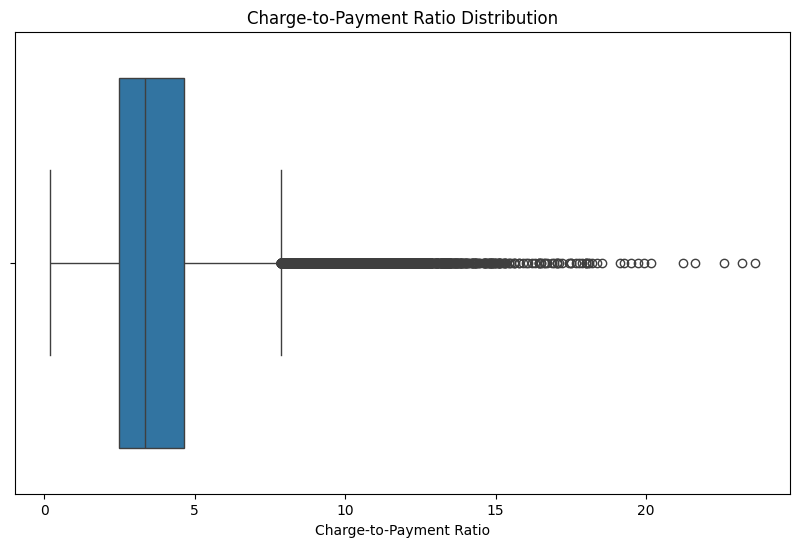

In [14]:
# Feature 1: Charge-to-Payment Ratio

# Create Charge-to-Payment Ratio
df['Charge_to_Payment_Ratio'] = df['Average Covered Charges'] / df['Average Total Payments']

# EDA and Visualization
# Describe the feature
print(df['Charge_to_Payment_Ratio'].describe())

# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Charge_to_Payment_Ratio'])
plt.title('Charge-to-Payment Ratio Distribution')
plt.xlabel('Charge-to-Payment Ratio')
plt.show()



The Charge-to-Payment Ratio indicates the markup hospitals apply over the payments they receive. 
A higher ratio suggests that a hospital charges significantly more than what they are paid, 
which could indicate aggressive pricing strategies or inefficiencies. 
Identifying hospitals with unusually high ratios can help in investigating pricing practices and potential overcharging.


In [12]:
# Feature 2: Payment Coverage Ratio
## Create Payment Coverage Ratio
df['Payment_Coverage_Ratio'] = df['Average Medicare Payments'] / df['Average Total Payments']


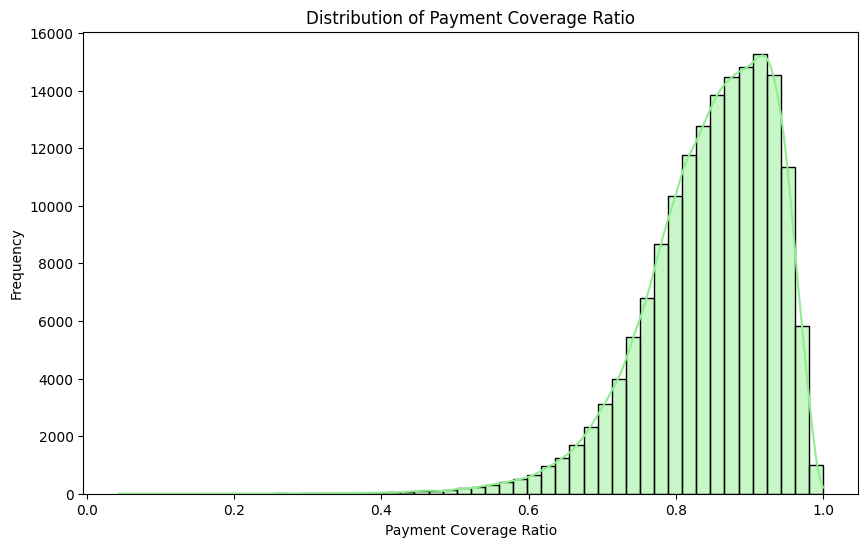

In [13]:
# Plot histogram with KDE
plt.figure(figsize=(10,6))
sns.histplot(df['Payment_Coverage_Ratio'], bins=50, kde=True, color='lightgreen')
plt.title('Distribution of Payment Coverage Ratio')
plt.xlabel('Payment Coverage Ratio')
plt.ylabel('Frequency')
plt.show()


The Payment Coverage Ratio indicates the extent to which Medicare payments cover the total payments. A ratio close to 1 suggests that Medicare covers most of the payments, while a lower ratio indicates that patients or other insurers cover a significant portion. Understanding this ratio helps identify procedures or providers where patients may face higher out-of-pocket expenses.



In [18]:
# Feature 3: State-Level Average Total Payments
state_avg_payments = df.groupby('Provider State')['Average Total Payments'].mean().reset_index()
state_avg_payments.rename(columns={'Average Total Payments': 'State_Avg_Total_Payments'}, inplace=True)

# Merge back to the original dataframe
df = df.merge(state_avg_payments, on='Provider State', how='left')


/var/folders/vt/3qxdk7_s1hs6ykxry_zsnp1r0000gn/T/ipykernel_25561/252356237.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Provider State', y='State_Avg_Total_Payments', data=df, order=state_order, palette='viridis')


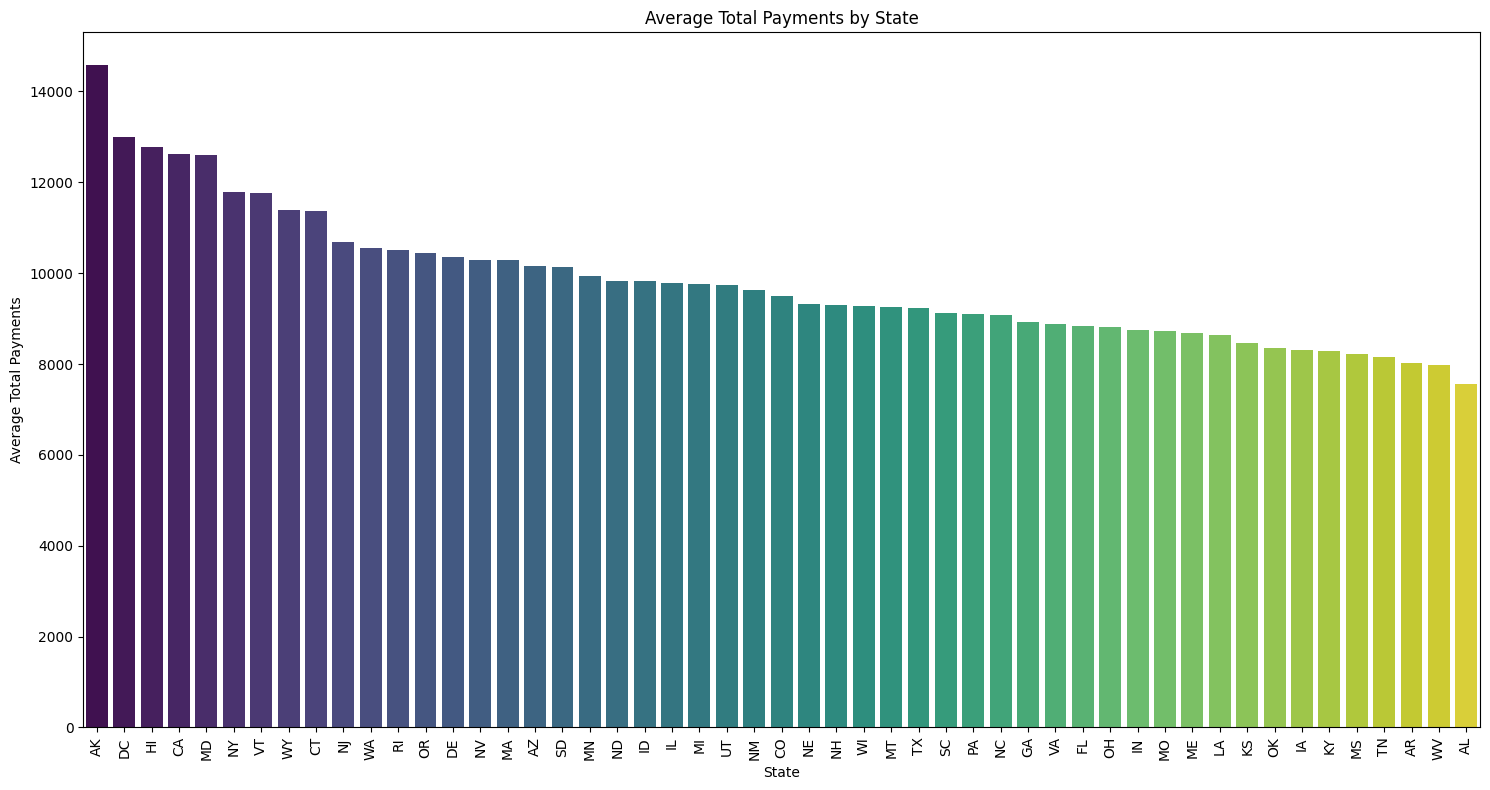

In [19]:
# Sort states by average payments
state_order = df.groupby('Provider State')['State_Avg_Total_Payments'].mean().sort_values(ascending=False).index

# Plot bar chart
plt.figure(figsize=(15,8))
sns.barplot(x='Provider State', y='State_Avg_Total_Payments', data=df, order=state_order, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Total Payments by State')
plt.xlabel('State')
plt.ylabel('Average Total Payments')
plt.tight_layout()
plt.show()


This feature highlights regional variations in healthcare costs. States with higher average total payments may reflect higher costs of living, differences in healthcare practices, or varying levels of competition among providers. This insight is valuable for policymakers and healthcare administrators.



In [20]:
# Feature 4: HRR-Level Provider Counts
hrr_provider_counts = df.groupby('Hospital Referral Region Description')
['Provider Id'].nunique().reset_index()
hrr_provider_counts.rename(columns={'Provider Id': 'Providers_in_HRR'}, inplace=True)

# Merge back to the original dataframe
df = df.merge(hrr_provider_counts, on='Hospital Referral Region Description', how='left')


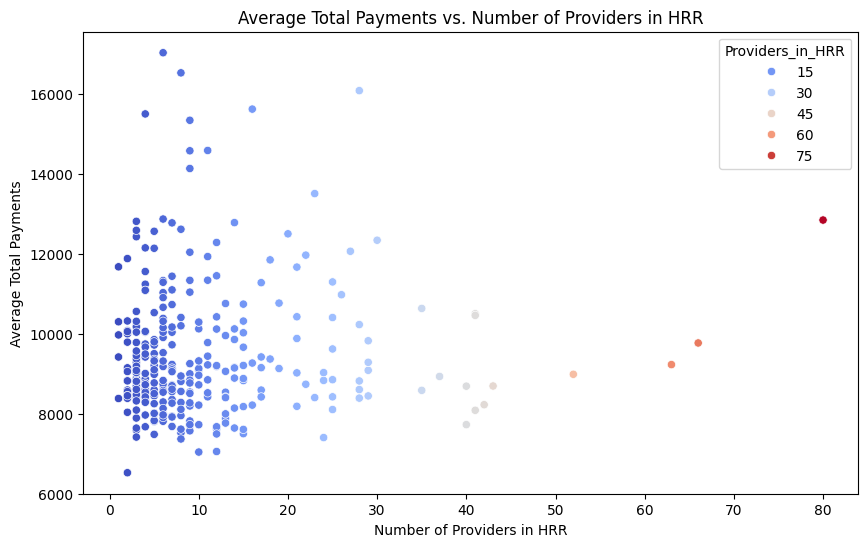

In [21]:
# Calculate average payments per HRR
hrr_avg_payments = df.groupby('Hospital Referral Region Description')['Average Total Payments'].mean().reset_index()

# Merge the provider counts
hrr_analysis = hrr_avg_payments.merge(hrr_provider_counts, on='Hospital Referral Region Description')

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Providers_in_HRR', y='Average Total Payments', data=hrr_analysis, hue='Providers_in_HRR', palette='coolwarm')
plt.title('Average Total Payments vs. Number of Providers in HRR')
plt.xlabel('Number of Providers in HRR')
plt.ylabel('Average Total Payments')
plt.show()


This visualization helps us understand if there's any correlation between the number of providers in a region and the average payments. It can indicate how competition may affect healthcare costs.



In [22]:
# Feature 5: Hospital Urbanization Level
# Count the number of times each city appears
city_counts = df['Provider City'].value_counts()

# Define a threshold for urban areas (e.g., cities appearing more than 50 times)
urban_cities = city_counts[city_counts > 50].index.tolist()

# Create Hospital Urbanization Level
df['Hospital_Urbanization'] = np.where(df['Provider City'].isin(urban_cities), 'Urban', 'Rural')


/var/folders/vt/3qxdk7_s1hs6ykxry_zsnp1r0000gn/T/ipykernel_25561/687436682.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hospital_Urbanization', data=df, palette='Set2')


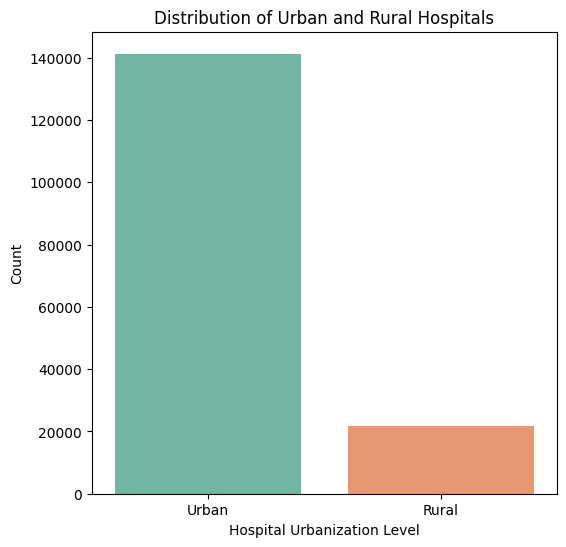

In [23]:
# Countplot of Urban vs Rural Hospitals
plt.figure(figsize=(6,6))
sns.countplot(x='Hospital_Urbanization', data=df, palette='Set2')
plt.title('Distribution of Urban and Rural Hospitals')
plt.xlabel('Hospital Urbanization Level')
plt.ylabel('Count')
plt.show()


/var/folders/vt/3qxdk7_s1hs6ykxry_zsnp1r0000gn/T/ipykernel_25561/3880747766.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hospital_Urbanization', y='Average Total Payments', data=df, palette='Set3')


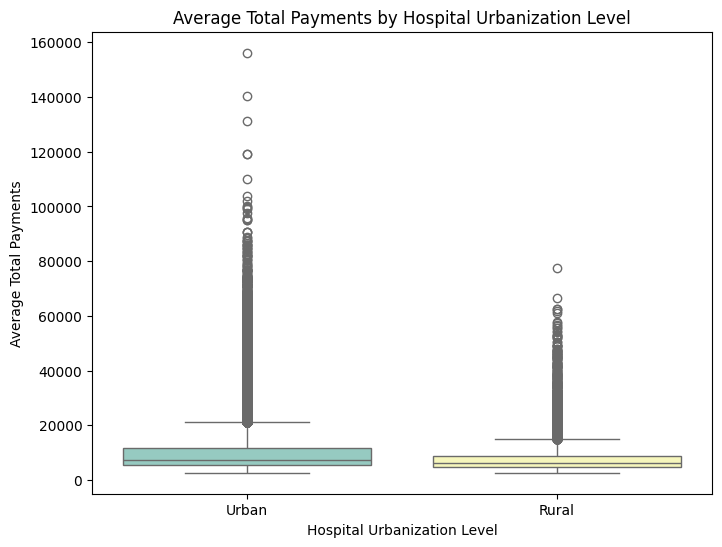

In [24]:
# Boxplot of Average Total Payments by Hospital Urbanization Level
plt.figure(figsize=(8,6))
sns.boxplot(x='Hospital_Urbanization', y='Average Total Payments', data=df, palette='Set3')
plt.title('Average Total Payments by Hospital Urbanization Level')
plt.xlabel('Hospital Urbanization Level')
plt.ylabel('Average Total Payments')
plt.show()


Comparing costs between urban and rural hospitals can reveal differences due to factors like operational costs, patient demographics, and access to resources.



In [25]:
# Feature 6: Medicare Payment to Charge Ratio
# Create Medicare Payment to Charge Ratio
df['Medicare_Payment_to_Charge_Ratio'] = df['Average Medicare Payments'] / df['Average Covered Charges']


/var/folders/vt/3qxdk7_s1hs6ykxry_zsnp1r0000gn/T/ipykernel_25561/1805586953.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Medicare_Payment_to_Charge_Ratio'], shade=True, color='purple')


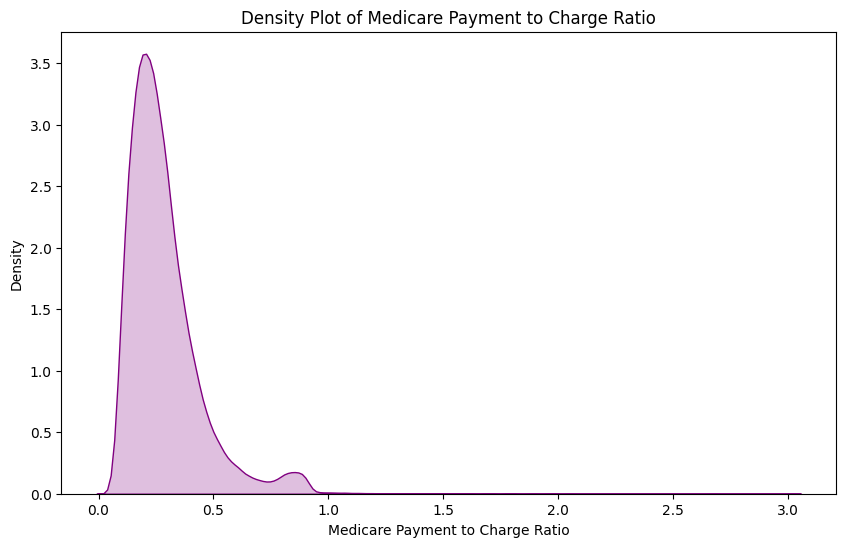

In [26]:
# Density plot
plt.figure(figsize=(10,6))
sns.kdeplot(df['Medicare_Payment_to_Charge_Ratio'], shade=True, color='purple')
plt.title('Density Plot of Medicare Payment to Charge Ratio')
plt.xlabel('Medicare Payment to Charge Ratio')
plt.ylabel('Density')
plt.show()


The Medicare Payment to Charge Ratio highlights the proportion of hospital charges that are reimbursed by Medicare. A low ratio indicates that Medicare payments cover a small portion of charges, potentially leading to financial strain on hospitals or higher costs for patients.



In [27]:
# Feature 7: Average Payment Difference
df['Average_Payment_Difference'] = df['Average Covered Charges'] - df['Average Total Payments']


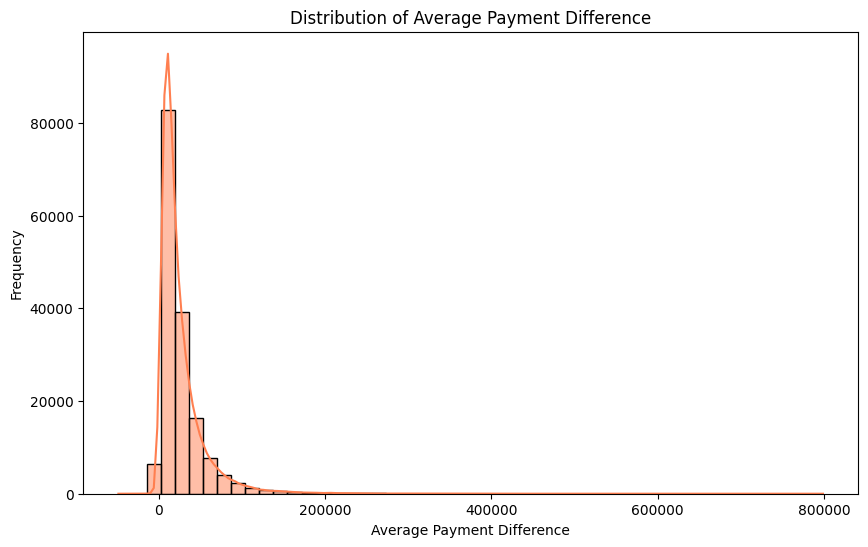

In [28]:
# Histogram with KDE
plt.figure(figsize=(10,6))
sns.histplot(df['Average_Payment_Difference'], bins=50, kde=True, color='coral')
plt.title('Distribution of Average Payment Difference')
plt.xlabel('Average Payment Difference')
plt.ylabel('Frequency')
plt.show()


This feature shows the gap between what hospitals charge and what they receive in payments. A larger gap may indicate higher uncompensated care or billing inefficiencies.



In [43]:
# Extract DRG Code
df['DRG_Code'] = df['DRG Definition'].str.extract('(\d+)').astype(int)

# Calculate national average total payments per DRG
drg_avg_payments = df.groupby('DRG_Code')['Average Total Payments'].mean().reset_index()
drg_avg_payments.rename(columns={'Average Total Payments': 'DRG_National_Avg_Payment'}, inplace=True)

# Calculate provider's average total payments per DRG
provider_drg_payments = df.groupby(['Provider Id', 'DRG_Code'])['Average Total Payments'].mean().reset_index()
provider_drg_payments.rename(columns={'Average Total Payments': 'Provider_DRG_Avg_Payment'}, inplace=True)

# Merge national average payments with provider payments
provider_drg_payments = provider_drg_payments.merge(drg_avg_payments, on='DRG_Code', how='left')

# Calculate the payment difference
provider_drg_payments['DRG_Payment_Difference'] = provider_drg_payments['Provider_DRG_Avg_Payment'] - provider_drg_payments['DRG_National_Avg_Payment']

# Merge back to the original dataframe
df = df.merge(provider_drg_payments[['Provider Id', 'DRG_Code', 'DRG_Payment_Difference']], on=['Provider Id', 'DRG_Code'], how='left')


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/vt/3qxdk7_s1hs6ykxry_zsnp1r0000gn/T/ipykernel_25561/2719357722.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['DRG_Code'] = df['DRG Definition'].str.extract('(\d+)').astype(int)


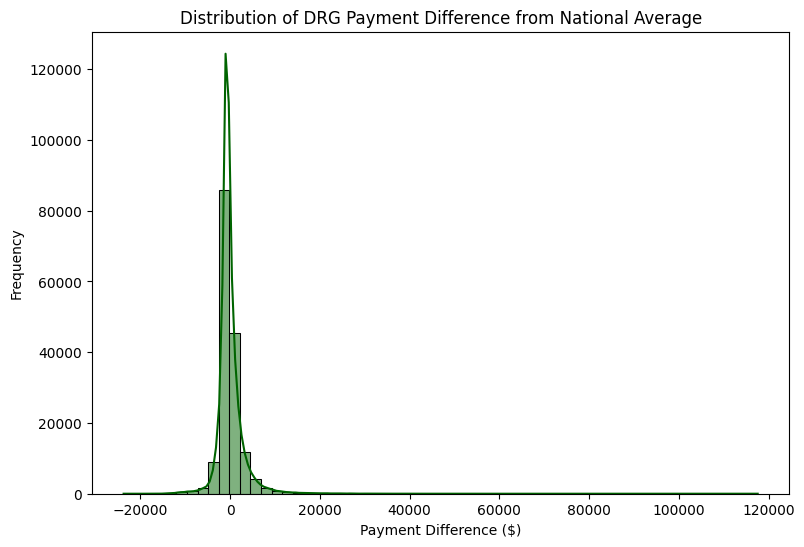

In [53]:
# Plot histogram with KDE
plt.figure(figsize=(9,6))
sns.histplot(df['DRG_Payment_Difference'], bins=60, kde=True, color='darkgreen')
plt.title('Distribution of DRG Payment Difference from National Average')
plt.xlabel('Payment Difference ($)')
plt.ylabel('Frequency')
plt.show()


/var/folders/vt/3qxdk7_s1hs6ykxry_zsnp1r0000gn/T/ipykernel_25561/3124094758.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DRG_Code', y='DRG_Payment_Difference', data=df[df['DRG_Code'].isin(top_drg_codes)], palette='Set2')


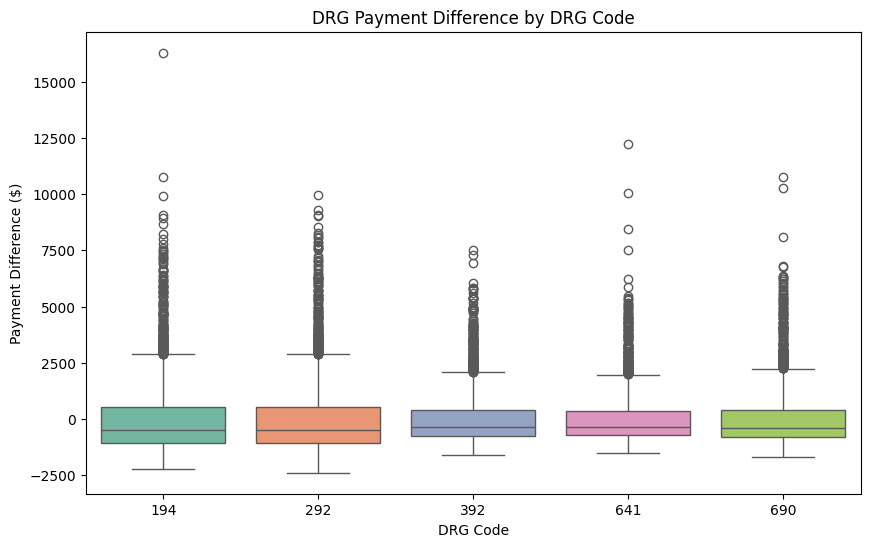

In [45]:
# Select top 5 most common DRG Codes
top_drg_codes = df['DRG_Code'].value_counts().head(5).index

# Boxplot of Payment Differences for Top DRG Codes
plt.figure(figsize=(10,6))
sns.boxplot(x='DRG_Code', y='DRG_Payment_Difference', data=df[df['DRG_Code'].isin(top_drg_codes)], palette='Set2')
plt.title('DRG Payment Difference by DRG Code')
plt.xlabel('DRG Code')
plt.ylabel('Payment Difference ($)')
plt.show()


The DRG Payment Difference from National Average feature provides valuable insights into how individual providers' charges for specific procedures compare to national benchmarks.

In [34]:
# Feature 9: Provider Market Share
# Calculate total discharges per state
state_total_discharges = df.groupby('Provider State')['Total Discharges'].sum().reset_index()
state_total_discharges.rename(columns={'Total Discharges': 'State_Total_Discharges'}, inplace=True)

# Calculate total discharges per provider
provider_total_discharges = df.groupby(['Provider Id', 'Provider State'])['Total Discharges'].sum().reset_index()
provider_total_discharges.rename(columns={'Total Discharges': 'Provider_Total_Discharges'}, inplace=True)

# Merge state total discharges with provider total discharges
provider_state_discharges = provider_total_discharges.merge(state_total_discharges, on='Provider State')

# Calculate Provider Market Share in State
provider_state_discharges['Provider_Market_Share'] = provider_state_discharges['Provider_Total_Discharges'] / provider_state_discharges['State_Total_Discharges']

# Merge back to the original dataframe
df = df.merge(provider_state_discharges[['Provider Id', 'Provider State', 'Provider_Market_Share']], on=['Provider Id', 'Provider State'], how='left')



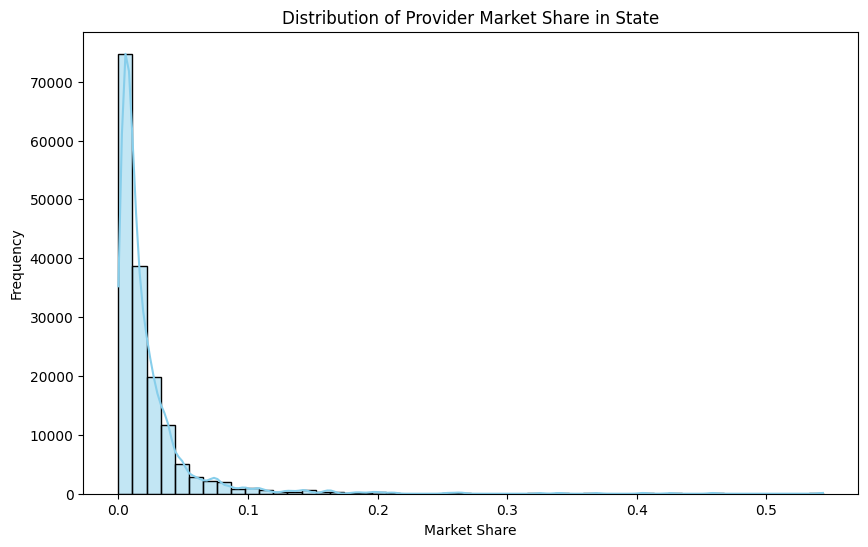

In [35]:
# Histogram of Provider Market Share
plt.figure(figsize=(10,6))
sns.histplot(df['Provider_Market_Share'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Provider Market Share in State')
plt.xlabel('Market Share')
plt.ylabel('Frequency')
plt.show()


The Provider Market Share in State feature quantifies the proportion of total discharges that a provider handles within their state. A higher market share indicates that the provider serves a larger portion of patients in the state, potentially reflecting a dominant position in the market. From the histogram, we may observe that most providers have a small market share, while a few have a significant share. Identifying providers with high market shares can be important for competitive analysis, regulatory scrutiny, and understanding the healthcare landscape.



In [40]:
# Feature 10: Provider Payment Difference from State Average
# Calculate average total payments per provider
provider_avg_payments = df.groupby(['Provider Id', 'Provider State'])['Average Total Payments'].mean().reset_index()
provider_avg_payments.rename(columns={'Average Total Payments': 'Provider_Avg_Total_Payments'}, inplace=True)

# Calculate average total payments per state
state_avg_payments = df.groupby('Provider State')['Average Total Payments'].mean().reset_index()
state_avg_payments.rename(columns={'Average Total Payments': 'State_Avg_Total_Payments'}, inplace=True)

# Merge the provider and state averages
provider_state_payments = provider_avg_payments.merge(state_avg_payments, on='Provider State')

# Calculate the payment difference
provider_state_payments['Payment_Difference'] = provider_state_payments['Provider_Avg_Total_Payments'] - provider_state_payments['State_Avg_Total_Payments']

# Merge back to the original dataframe
df = df.merge(provider_state_payments[['Provider Id', 'Provider State', 'Payment_Difference']], on=['Provider Id', 'Provider State'], how='left')


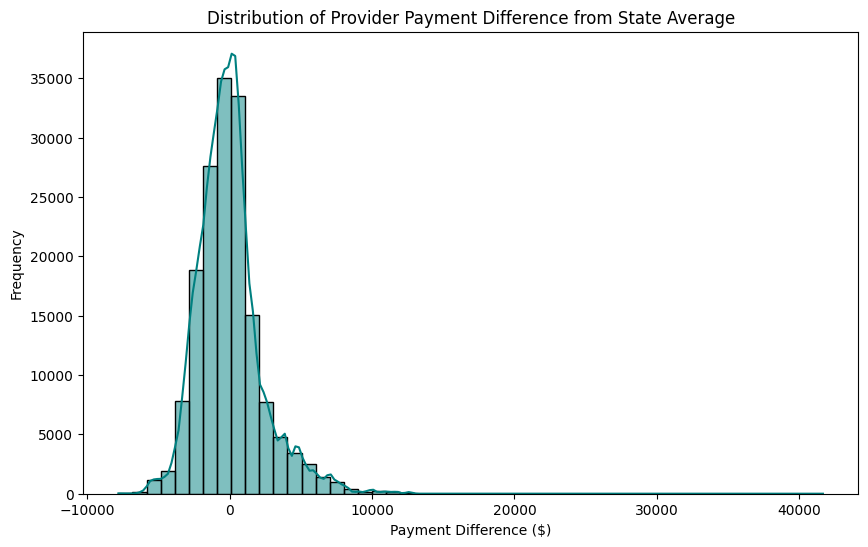

In [41]:
# Histogram of Payment Differences
plt.figure(figsize=(10,6))
sns.histplot(df['Payment_Difference'], bins=50, kde=True, color='teal')
plt.title('Distribution of Provider Payment Difference from State Average')
plt.xlabel('Payment Difference ($)')
plt.ylabel('Frequency')
plt.show()


/var/folders/vt/3qxdk7_s1hs6ykxry_zsnp1r0000gn/T/ipykernel_25561/3574128476.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Provider State', y='Payment_Difference', data=df, showfliers=False, palette='Spectral')


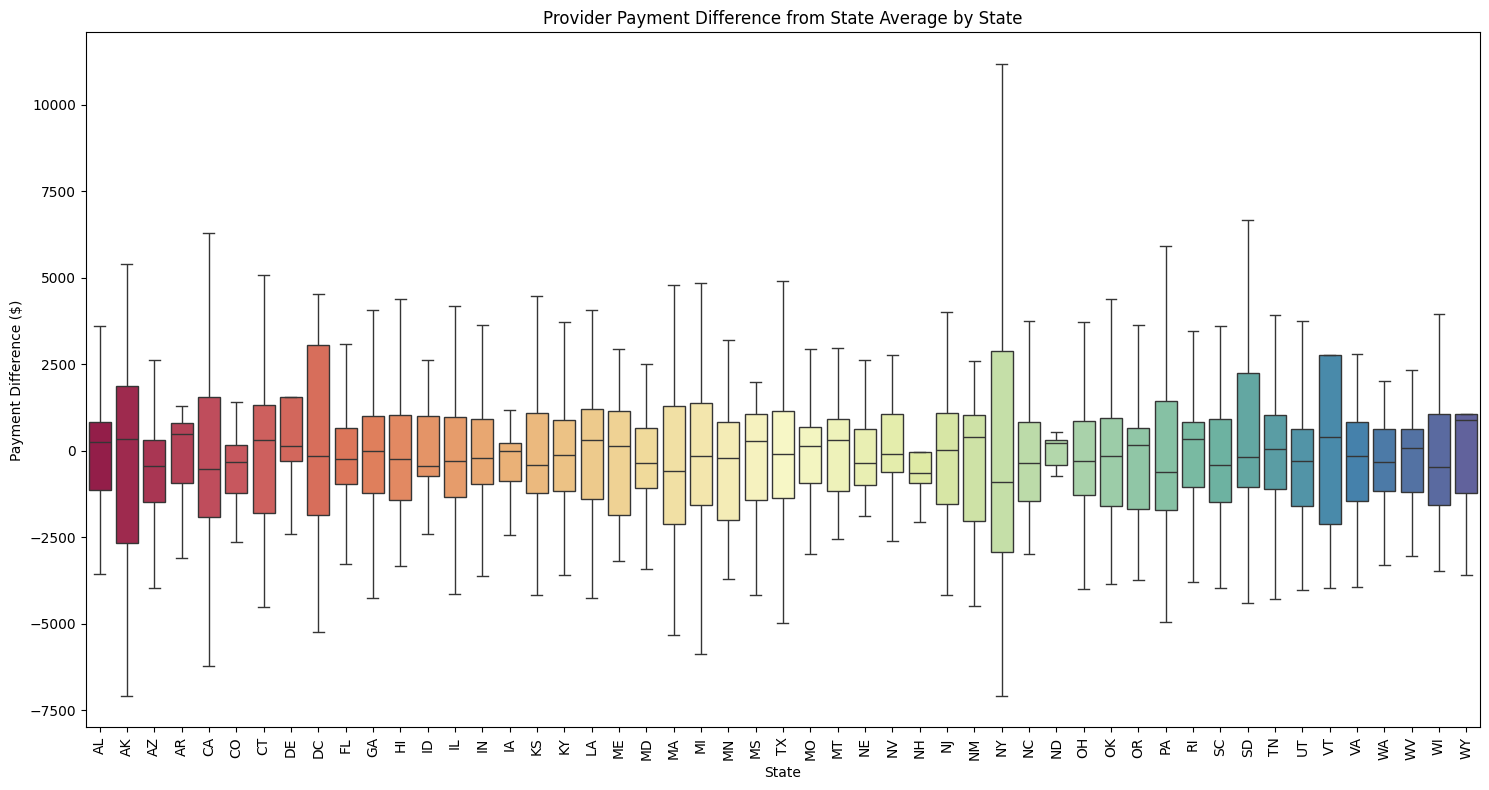

In [42]:
# Boxplot of Payment Differences by State
plt.figure(figsize=(15,8))
sns.boxplot(x='Provider State', y='Payment_Difference', data=df, showfliers=False, palette='Spectral')
plt.xticks(rotation=90)
plt.title('Provider Payment Difference from State Average by State')
plt.xlabel('State')
plt.ylabel('Payment Difference ($)')
plt.tight_layout()
plt.show()


By introducing the Provider Payment Difference from State Average feature, we gain valuable business insights into how providers' average payments compare within their state context. The histograms and boxplots provide clear, interpretable visualizations that help identify patterns and outliers.

